In [ ]:
import networkx as nx
G_all=nx.Graph()
for i in c:
  G_all.add_edge(i[0],i[1])

In [10]:
scipy_kde=st.gaussian_kde(data)
dens = scipy_kde(data)
dens

LinAlgError: 1-th leading minor of the array is not positive definite

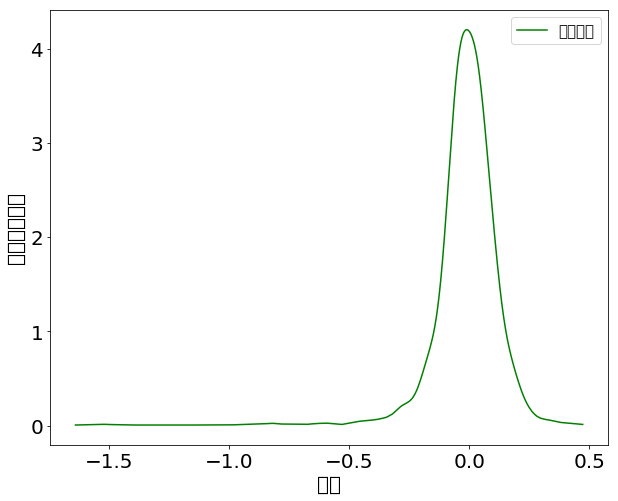

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
plt.figure(figsize = (10, 8))
X = np.array(data['F2_3'])  # 转化为1D array
scipy_kde = st.gaussian_kde(X)  # 高斯核密度估计
X.sort()
'''这三种方法都可以得到估计的概率密度'''
dens = scipy_kde.evaluate(X)
#dens1=scipy_kde.pdf(X)  # pdf求概率密度
#dens2=scipy_kde(X)
plt.plot(X, dens, c='green', label='核密度值')
plt.tick_params(labelsize = 20)  # 设置坐标刻度值的大小      
font = {'size': 20}  # 设置横纵坐标的名称以及对应字体格式、大小
plt.xlabel('变量', font)
plt.ylabel('概率密度函数', font)
plt.legend(fontsize = 15)  # 显示图例,设置图例字体大小
plt.show()

In [7]:
dens

array([0.00497294, 0.0115484 , 0.01253968, ..., 0.02311075, 0.01758854,
       0.01138771])

# 软阈值β筛选

## 1、导入数据

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from scipy.stats import norm
from scipy import stats
import networkx as nx
import datetime

data=pd.read_csv('LiverFemale3600.csv')
data.dropna(inplace=True)
data.set_index(data.columns[0],inplace=True)
data.head()

,F2_2,F2_3,F2_14,F2_15,F2_19,F2_20,F2_23,F2_24,F2_26,F2_37,...,F2_324,F2_325,F2_326,F2_327,F2_328,F2_329,F2_330,F2_332,F2_355,F2_357
substanceBXH,,,,,,,,,,,,,,,,,,,,,
MMT00000044,-0.0181,0.0642,0.000064,-0.05800,0.04830,-0.151974,-0.00129,-0.23600,-0.0307,-0.02610,...,0.047700,-0.0488,0.0168,-0.0309,0.02740,-0.0310,0.0660,-0.0199,-0.0146,0.065000
MMT00000046,-0.0773,-0.0297,0.112000,-0.05890,0.04430,-0.093800,0.09340,0.02690,-0.1330,0.07570,...,-0.049200,-0.0350,-0.0738,-0.1730,-0.07380,-0.2010,-0.0820,-0.0939,0.0192,-0.049900
MMT00000051,-0.0226,0.0617,-0.129000,0.08710,-0.11500,-0.065026,0.00249,-0.10200,0.1420,-0.10200,...,0.000612,0.1210,0.0996,0.1090,0.02730,0.1200,-0.0629,-0.0395,0.1090,0.000253
MMT00000080,-0.0487,0.0582,-0.048300,-0.03710,0.02510,0.085043,0.04450,0.00167,-0.0680,0.00567,...,0.113000,-0.0859,-0.1340,0.0639,0.00731,0.1240,-0.0212,0.0870,0.0512,0.024300
MMT00000102,0.1760,-0.1890,-0.065000,-0.00846,-0.00574,-0.018072,-0.12500,-0.06820,0.1250,0.00998,...,-0.080000,-0.1200,0.1230,0.1870,0.05410,0.0699,0.0708,0.1450,-0.0399,0.037500


In [342]:
help(data.T.corr())

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
 |  
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray (structured or homogeneous), dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for Python 3.6
 |         and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-l

## 2、软阈值计算

In [3]:
start = datetime.datetime.now()
G_all=nx.Graph()
data_len=len(data)
data_list=data.index
#相关性系数
result=data.T.corr()
#运行时间
end = datetime.datetime.now()
print("时间：",end-start)

时间： 0:00:09.289201


In [4]:
np.fill_diagonal(result.values, 0)
arr=abs(result)
arr_len=len(arr)
temp=np.zeros(arr_len)
for i in range(1,3):    
    temp=temp+(arr**i)/i
temp.head()

substanceBXH,MMT00000044,MMT00000046,MMT00000051,MMT00000080,MMT00000102,MMT00000149,MMT00000159,MMT00000207,MMT00000212,MMT00000241,...,MMT00082753,MMT00082759,MMT00082798,MMT00082822,MMT00082829,MMT00082832,MMT00082850,MMT00082869,MMT00082877,MMT00082906
substanceBXH,,,,,,,,,,,,,,,,,,,,,
MMT00000044,0.000000,0.151256,0.127723,0.038499,0.174776,0.150469,0.039732,0.055749,0.040410,0.069559,...,0.283788,0.259585,0.208980,0.162881,0.041975,0.034748,0.139239,0.148680,0.301681,0.122667
MMT00000046,0.151256,0.000000,0.728334,0.049977,0.763454,0.296920,0.110256,0.194043,0.461836,0.083253,...,0.386452,0.332012,0.578200,0.844994,0.221145,0.140971,0.628896,0.010682,0.325814,0.075113
MMT00000051,0.127723,0.728334,0.000000,0.061974,0.096041,0.279626,0.719102,0.432563,0.549306,0.185569,...,0.276479,0.040092,0.534604,0.705218,0.229944,0.510132,0.805841,0.070707,0.222062,0.001092
MMT00000080,0.038499,0.049977,0.061974,0.000000,0.101928,0.118981,0.097212,0.597337,0.046650,0.838776,...,0.137663,0.207288,0.012935,0.330876,1.164811,0.303138,0.067149,0.004718,0.152238,0.699017
MMT00000102,0.174776,0.763454,0.096041,0.101928,0.000000,0.304612,0.449397,0.033212,0.099451,0.100090,...,0.286503,0.301812,0.547826,0.265809,0.252107,0.174013,0.323302,0.288305,0.081244,0.012353


,beta,r2,meank
0,1.0,0.001579,683.970143
1,2.0,0.193164,297.709842
2,3.0,0.410875,173.086377
3,4.0,0.619393,120.827747
4,5.0,0.741184,96.126154
5,6.0,0.892932,84.551754
6,7.0,0.940257,80.597204
7,8.0,0.971655,82.057516
8,9.0,0.971214,88.225735
9,10.0,0.959321,99.251496


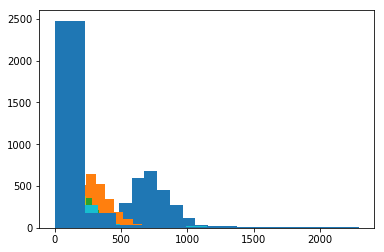

In [5]:
re1=pd.DataFrame(columns=['beta','r2','meank'])
for j in range(1,12):
    result_i=np.float_power(temp,j)
    tt_0=np.sum(abs(result_i),axis=0)-1
    n=plt.hist(x = tt_0), # 指定绘图数据
    x=n[0][0]
    y=[]
    for i in range(len(n[0][1])-1):
        y.append((n[0][1][i]+n[0][1][i+1])/2)
    x=np.log10(x)
    y=np.log10(y)
    res=stats.linregress(x, y)
    r2=np.float_power(res.rvalue,2)
    k=tt_0.mean()
    re1=re1.append({'beta':j,'r2':r2,'meank':k},ignore_index=True)
re1

In [353]:
for i in re1['r2']:
        if i>0.9:
            soft=re1[re1['r2']==i]['beta'].iloc[0]
            break
soft

7.0

In [58]:
sns.color_palette("seismic")

[(0.0, 0.0, 0.6952941176470588),
 (0.1450980392156863, 0.1450980392156863, 1.0),
 (0.7098039215686275, 0.7098039215686275, 1.0),
 (1.0, 0.7098039215686274, 0.7098039215686274),
 (1.0, 0.14509803921568631, 0.14509803921568631),
 (0.7823529411764706, 0.0, 0.0)]

In [59]:
sns.color_palette("mako")

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

In [11]:
cmap1[0]

(0.0, 0.0, 0.6952941176470588)

In [17]:
help(sns.regplot)

Help on function regplot in module seaborn.regression:

regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
    Plot data and a linear regression model fit.
    
    There are a number of mutually exclusive options for estimating the
    regression model. See the :ref:`tutorial <regression_tutorial>` for more
    information.    
    
    Parameters
    ----------
    x, y: string, series, or vector array
        Input variables. If strings, these should correspond with column names
        in ``data``. When pandas objects are used, axes will be labeled with
        the series name.
    data : DataFrame
        Tidy ("long-form") dataframe where each column is a variable and each
  

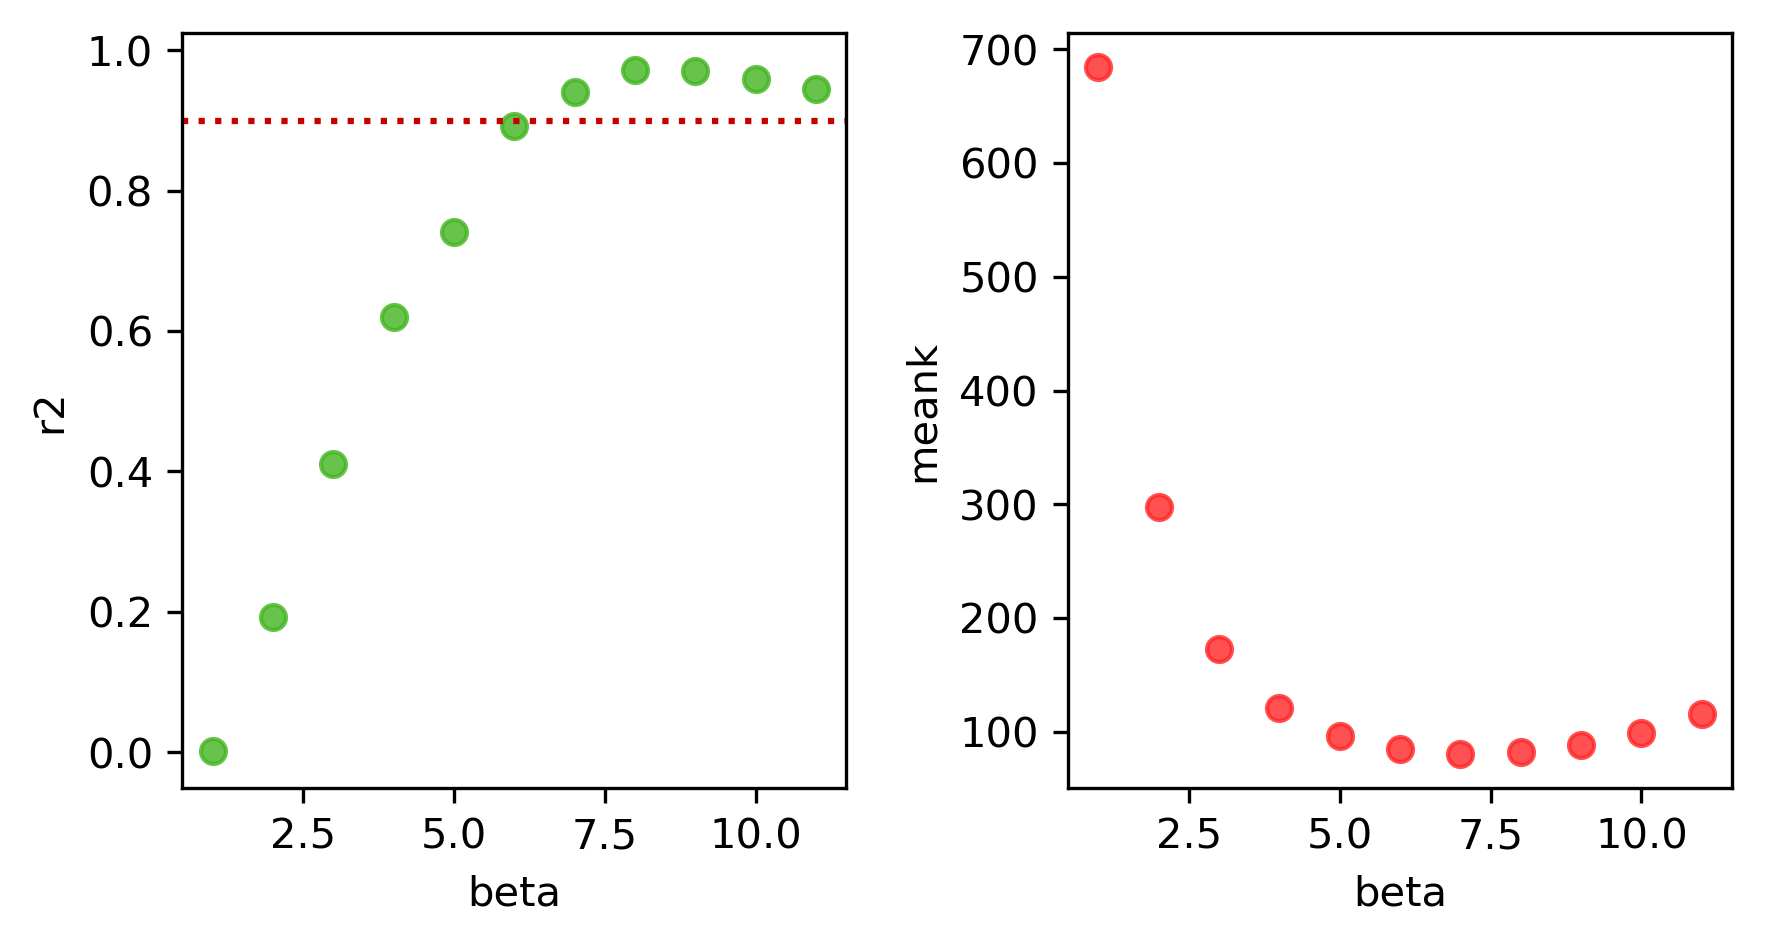

In [19]:

my_dpi=300
fig=plt.figure(figsize=(2000/my_dpi, 1000/my_dpi), dpi=my_dpi)
cc='seismic'
cmap = sns.color_palette(cc)
grid = plt.GridSpec(1, 4, wspace=1, hspace=0.1)
#fig, (ax0, ax1) = plt.subplots(2, 1)
plt.subplot(grid[0,0:2])
p1=sns.regplot(x=re1["beta"], y=re1['r2'], fit_reg=False, marker="o", color="#42B520")
p1.axhline(y=0.9,ls=":",c=cmap[5])

#fig, (ax0, ax1) = plt.subplots(2, 1)
plt.subplot(grid[0,2:4])
p1=sns.regplot(x=re1["beta"], y=re1['meank'], fit_reg=False, marker="o", color=cmap[4])

plt.show()

((array([1211.,  695.,  397.,  215.,  105.,   60.,   34.,   37.,   17.,
           14.]),
  array([ -0.4909389 ,  47.29907759,  95.08909407, 142.87911055,
         190.66912704, 238.45914352, 286.24916001, 334.03917649,
         381.82919297, 429.61920946, 477.40922594]),
  <a list of 10 Patch objects>),)

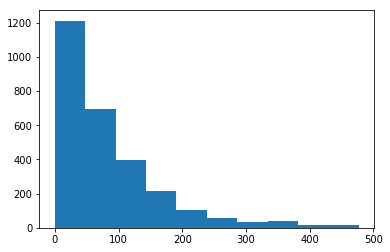

In [95]:
tt_0=np.sum(abs(np.float_power(temp,6)),axis=0)-1
plt.hist(x = tt_0), # 指定绘图数据

In [37]:
test

substanceBXH,MMT00000044,MMT00000046,MMT00000051,MMT00000080,MMT00000102,MMT00000149,MMT00000159,MMT00000207,MMT00000212,MMT00000241,...,MMT00082753,MMT00082759,MMT00082798,MMT00082822,MMT00082829,MMT00082832,MMT00082850,MMT00082869,MMT00082877,MMT00082906
substanceBXH,,,,,,,,,,,,,,,,,,,,,
MMT00000044,1.000000e+00,1.197504e-05,4.341150e-06,3.256149e-09,2.850266e-05,1.160594e-05,3.934096e-09,3.001930e-08,4.354126e-09,1.132742e-07,...,5.223542e-04,3.059698e-04,8.329766e-05,1.867339e-05,5.469334e-09,1.760377e-09,7.287326e-06,1.080208e-05,7.538520e-04,3.406891e-06
MMT00000046,1.197504e-05,1.000000e+00,1.492743e-01,1.558217e-08,1.980153e-01,6.852361e-04,1.796414e-06,5.338055e-05,9.703476e-03,3.329632e-07,...,3.330974e-03,1.339449e-03,3.736526e-02,3.640183e-01,1.169656e-04,7.848353e-06,6.186918e-02,1.486003e-12,1.196235e-03,1.795923e-07
MMT00000051,4.341150e-06,1.492743e-01,1.000000e+00,5.665705e-08,7.847442e-07,4.780371e-04,1.382745e-01,6.550819e-03,2.747182e-02,4.083473e-05,...,4.466520e-04,4.152634e-09,2.334498e-02,1.230099e-01,1.478197e-04,1.762360e-02,2.738400e-01,1.249611e-07,1.199083e-04,1.692309e-18
MMT00000080,3.256149e-09,1.558217e-08,5.665705e-08,1.000000e+00,1.121383e-06,2.837109e-06,8.439377e-07,4.542708e-02,1.030636e-08,3.482379e-01,...,6.806124e-06,7.933190e-05,4.683582e-12,1.312171e-03,2.497652e+00,7.759591e-04,9.167311e-08,1.102555e-14,1.244891e-05,1.166613e-01
MMT00000102,2.850266e-05,1.980153e-01,7.847442e-07,1.121383e-06,1.000000e+00,7.988876e-04,8.237175e-03,1.342171e-09,9.674992e-07,1.005440e-06,...,5.530631e-04,7.558232e-04,2.703055e-02,3.527133e-04,2.567520e-04,2.776416e-05,1.141964e-03,5.742685e-04,2.875780e-07,3.554065e-12
MMT00000149,1.160594e-05,6.852361e-04,4.780371e-04,2.837109e-06,7.988876e-04,1.000000e+00,3.659330e-06,6.025893e-02,8.914365e-05,8.861248e-03,...,1.084290e-03,5.028469e-20,2.407982e-02,2.022625e-14,6.039651e-03,2.552469e-07,8.921925e-06,6.106139e-02,5.063917e-02,8.391253e-04
MMT00000159,3.934096e-09,1.796414e-06,1.382745e-01,8.439377e-07,8.237175e-03,3.659330e-06,1.000000e+00,1.308707e-02,4.457971e-03,7.788086e-05,...,8.335968e-08,8.053848e-07,1.165694e-08,5.364075e-03,5.549562e-05,3.490221e-02,8.247591e-05,1.183968e-05,2.008927e-08,2.011392e-07
MMT00000207,3.001930e-08,5.338055e-05,6.550819e-03,4.542708e-02,1.342171e-09,6.025893e-02,1.308707e-02,1.000000e+00,1.091092e-03,9.313010e-02,...,2.419597e-08,1.580722e-05,3.966177e-05,7.835153e-08,2.292926e-01,2.691238e-03,3.535673e-05,2.437774e-08,1.029818e-02,1.362075e-01
MMT00000212,4.354126e-09,9.703476e-03,2.747182e-02,1.030636e-08,9.674992e-07,8.914365e-05,4.457971e-03,1.091092e-03,1.000000e+00,2.045567e-04,...,7.513430e-05,8.469747e-10,6.605621e-06,5.180256e-02,2.949492e-05,6.947933e-04,4.808289e-05,6.027643e-04,4.064906e-07,2.771614e-07


In [36]:
test=np.float_power(temp,6)
np.fill_diagonal(test.values, 1.0)

In [7]:
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包


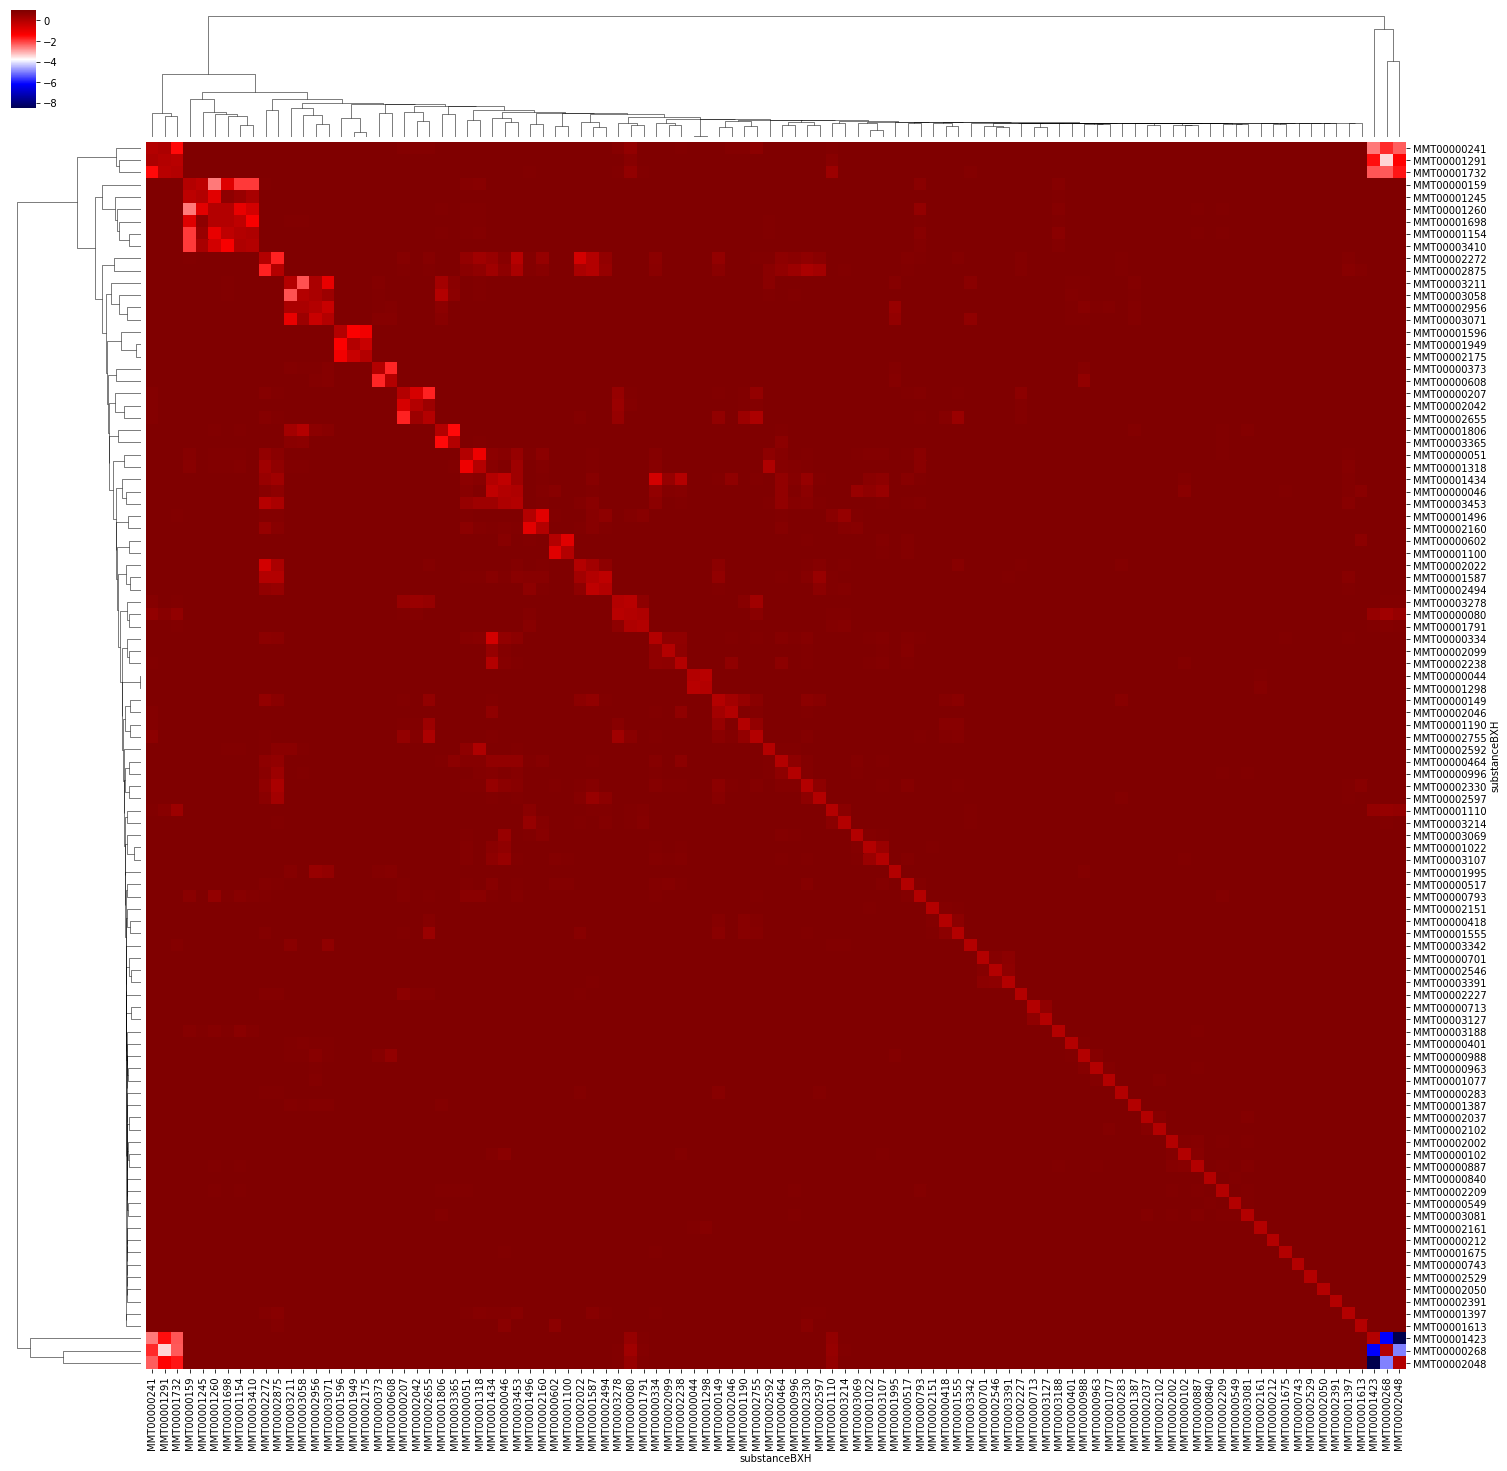

In [57]:
a=sns.clustermap(1-test.iloc[0:100,0:100],col_cluster=True,row_cluster=True,figsize=(25,25),cmap="seismic")

## 3、可视化模块（动态剪切树）

In [38]:
from dynamicTreeCut import cutreeHybrid
from scipy.spatial.distance import pdist
import numpy as np
from scipy.cluster.hierarchy import linkage,dendrogram

#d = np.transpose(np.arange(1,10001).reshape(100,100))
distances = pdist(1-test, "euclidean")

..cutHeight not given, setting it to 448.9691031625521  ===>  99% of the (truncated) height range in dendro.


D:\Anaconda\lib\site-packages\pandas\core\series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


..done.


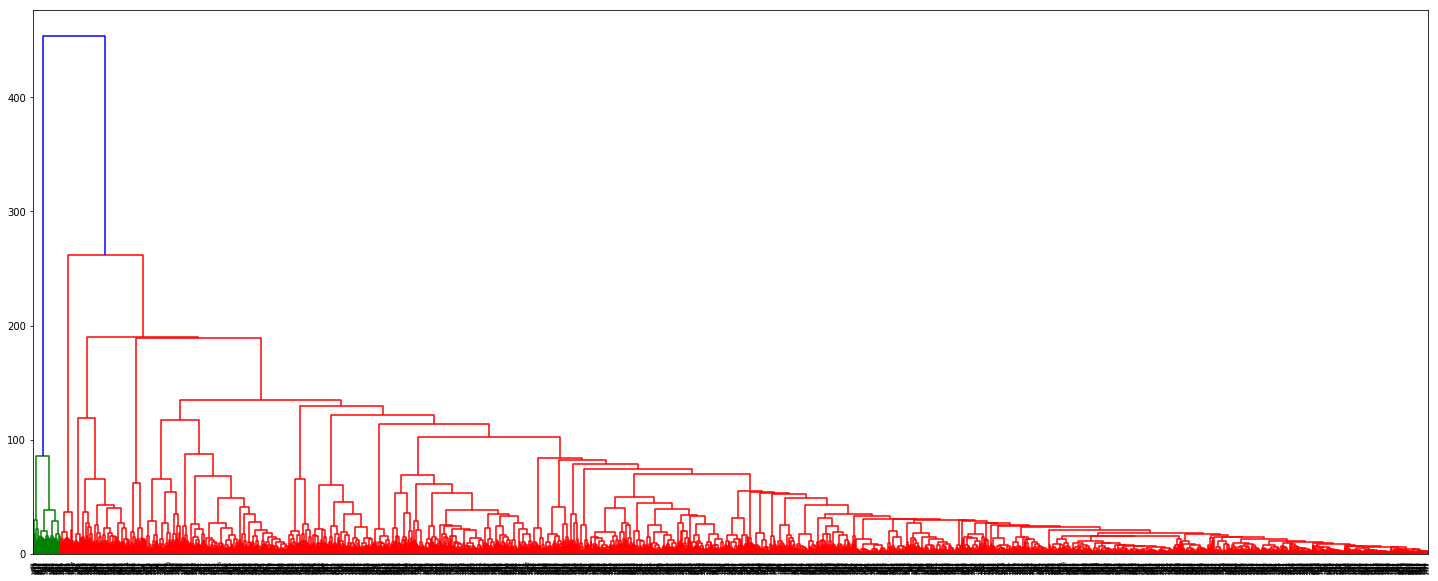

In [39]:
geneTree=linkage(distances, "ward")
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(geneTree)
dynamicMods=cutreeHybrid(geneTree,distM=distances,minClusterSize = 30,deepSplit = 2, pamRespectsDendro = False)

In [141]:
set(dynamicMods['labels'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [40]:
x=dn['ivl']
y=[dynamicMods['labels'][int(x)] for x in dn['ivl']]
yy=np.array([y])


In [41]:
z=[temp.index[int(x)] for x in dn['ivl']]
mol=pd.DataFrame(columns=['ivl','module','name'])
mol['ivl']=x
mol['module']=y
mol['name']=z


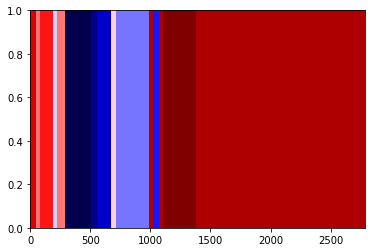

In [55]:
plt.pcolor(yy,cmap='seismic')

D:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
D:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
D:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


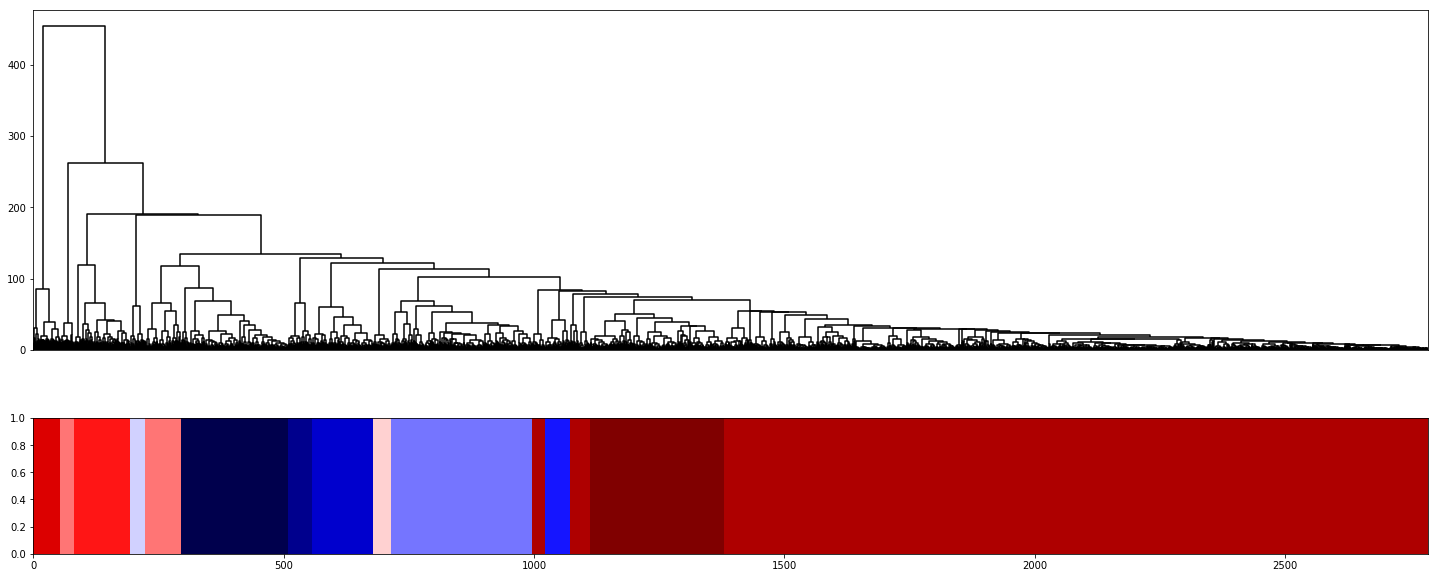

In [56]:
from scipy.cluster import hierarchy
plt.figure(figsize=(25, 10))
grid = plt.GridSpec(3, 1, wspace=0.5, hspace=0.5)
#fig, (ax0, ax1) = plt.subplots(2, 1)
plt.subplot(grid[0:2,0])
hierarchy.set_link_color_palette(['#000000'])
ax0=hierarchy.dendrogram(geneTree,color_threshold=0, above_threshold_color='black')
plt.tick_params( \
    axis='x',
    which='both',
    bottom='off',
    top='off',
    labelbottom='off')
#ax0.set_title('default: no edges')
plt.subplot(grid[2,0])
ax1=plt.pcolor(yy,cmap="seismic")
#ax1.set_title('thick edges')
#plt.subplots_adjust(hspace=0)
#fig.tight_layout()
plt.show()

In [97]:
temp.index

Index(['MMT00000044', 'MMT00000046', 'MMT00000051', 'MMT00000080',
       'MMT00000102', 'MMT00000149', 'MMT00000159', 'MMT00000207',
       'MMT00000212', 'MMT00000241',
       ...
       'MMT00082753', 'MMT00082759', 'MMT00082798', 'MMT00082822',
       'MMT00082829', 'MMT00082832', 'MMT00082850', 'MMT00082869',
       'MMT00082877', 'MMT00082906'],
      dtype='object', name='substanceBXH', length=2785)

In [28]:
def all_list(arr):
    result = {}
    for i in set(arr):
        result[i] = arr.count(i)
    return result

# 结果：{0: 1, 1: 2, 2: 3, 3: 2}
testt=all_list(list(dynamicMods['labels']))

In [127]:
i

'MMT00041434'

In [132]:
ann[ann['substanceBXH']=='MMT00041434']['gene_symbol'].iloc[0]

nan

In [384]:
#增加基因名
ann=pd.read_csv('GeneAnnotation.csv')
rei=[ann[ann['substanceBXH']==i]['gene_symbol'].iloc[0] for i in mol['name']]
mol['gene']=rei

In [293]:
mol[mol['module']==11].dropna().to_csv('mol11.csv')

In [287]:
len(mol)

2785

## 5、主成分分析

In [318]:
pcamol=pd.DataFrame(columns=data.columns)
set_index=set(mol['module'])
for j in set_index:
    newdata=pd.DataFrame(columns=data.columns)
    for i in list(mol[mol['module']==j].dropna()['name']):
        newdata=newdata.append(data[data.index==i])
    from sklearn.decomposition import PCA
    pca = PCA(n_components=1) 
    reduced_X = pca.fit_transform(newdata.T)
    tepcamol=pd.DataFrame(reduced_X.T,columns=data.columns)
    pcamol=pcamol.append(tepcamol,ignore_index=True)
pcamol.index=set_index

In [227]:
#性状矩阵
cri=pd.read_csv('ClinicalTraits.csv')
newcri=pd.DataFrame(columns=cri.columns)
for i in data.columns:   
    newcri=newcri.append(cri[cri['Mice']==i],ignore_index=True)
newcri

,Unnamed: 0,Mice,Number,Mouse_ID,Strain,sex,DOB,parents,Western_Diet,Sac_Date,...,Adiponectin,Aortic lesions,Note,Aneurysm,Aortic_cal_M,Aortic_cal_L,CoronaryArtery_Cal,Myocardial_cal,BMD_all_limbs,BMD_femurs_only
0,207,F2_2,2,133-2,"BxH ApoE-/-, F2",2,2001-10-22,111.0,2001-12-17,2002-04-08,...,NaN,224500.0,NaN,56.0,5.0,0.0,0.0,0.0,NaN,NaN
1,208,F2_3,3,133-3,"BxH ApoE-/-, F2",2,2001-10-22,111.0,2001-12-17,2002-04-08,...,14.339,296250.0,NaN,8.0,4.0,NaN,0.0,0.0,NaN,NaN
2,219,F2_14,14,137-1,"BxH ApoE-/-, F2",2,2001-10-22,109.0,2001-12-17,2002-04-08,...,15.439,486313.0,0.75,27.0,12.0,NaN,1.0,8.0,NaN,NaN
3,220,F2_15,15,137-2,"BxH ApoE-/-, F2",2,2001-10-22,109.0,2001-12-17,2002-04-08,...,11.124,180750.0,NaN,0.0,0.0,NaN,0.0,4.0,NaN,NaN
4,224,F2_19,19,144-1,"BxH ApoE-/-, F2",2,2001-10-24,110.0,2001-12-17,2002-04-08,...,16.842,113000.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN
5,225,F2_20,20,144-2,"BxH ApoE-/-, F2",2,2001-10-24,110.0,2001-12-17,2002-04-08,...,13.498,166750.0,NaN,6.0,0.0,NaN,0.0,0.0,NaN,NaN
6,228,F2_23,23,151-1,"BxH ApoE-/-, F2",2,2001-11-10,112.0,2002-01-08,2002-04-30,...,14.511,234000.0,NaN,28.0,8.0,NaN,0.0,0.0,NaN,NaN
7,229,F2_24,24,151-2,"BxH ApoE-/-, F2",2,2001-11-10,112.0,2002-01-08,2002-04-30,...,13.813,267500.0,NaN,33.0,8.0,NaN,0.0,1.0,NaN,NaN
8,231,F2_26,26,151-4,"BxH ApoE-/-, F2",2,2001-11-10,112.0,2002-01-08,2002-04-30,...,14.118,198000.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN
9,266,F2_37,37,155-2,"BxH ApoE-/-, F2",2,2001-11-13,NaN,2002-01-08,2002-04-30,...,12.470,121000.0,NaN,0.0,0.0,0.0,0.0,3.0,NaN,NaN


In [359]:
newnewcri=pd.DataFrame(columns=newcri.columns[10:14])
for i in range(len(newcri)):
    newnewcri=newnewcri.append(newcri.iloc[i,10:14])
newnewcri.index=newcri['Mice']
newnewcri.to_csv('newnewcri.csv')

In [338]:
from scipy.stats import spearmanr,pearsonr,kendalltau
# seed random number generator
# calculate spearman's correlation
result_1=pd.DataFrame(columns=newnewcri.columns)
result_p=pd.DataFrame(columns=newnewcri.columns)
for j in newnewcri.columns:
    co=[]
    pvv=[]
    for i in range(len(pcamol)):   
        tempcor=pd.DataFrame(columns=['x','y'])
        tempcor['x']=list(newcri[j])
        tempcor['y']=list(pcamol.iloc[i])
        tempcor=tempcor.dropna()
        coef,pv=pearsonr(tempcor['x'],tempcor['y'])
        co.append(coef)
        pvv.append(pv)
    result_1[j]=co
    result_p[j]=pvv
        #print(coef)
result_1=abs(result_1)

In [334]:
str(coef)+'('+str(pv)+')'

'-0.4465721458538156(5.667571913912509e-08)'

In [339]:
result_1.index=set_index
result_p.index=set_index
result_p

,weight_g,length_cm,ab_fat,other_fat
1,9.833129e-01,0.123533,7.370441e-01,1.315513e-02
2,1.314628e-05,0.339842,5.819885e-04,3.043035e-05
3,1.126663e-03,0.805638,1.221870e-03,1.409295e-02
4,8.569493e-02,0.161288,1.807469e-02,5.889726e-01
5,2.259025e-03,0.068516,3.314510e-04,5.583534e-01
6,9.331135e-01,0.428312,7.461927e-01,9.601241e-01
7,9.833476e-01,0.501911,7.355670e-01,9.706715e-02
8,5.565951e-04,0.113775,1.661000e-03,1.228199e-01
9,1.512899e-02,0.109674,2.896697e-03,9.617716e-01
10,5.794533e-02,0.705549,1.789780e-01,4.638594e-02


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text yticklabel objects>)

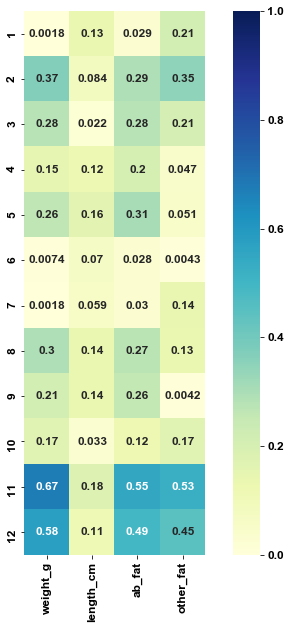

In [373]:
plt.figure(figsize=(10,10))
plt.rc('font', family='Arial')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = "12"
plt.rcParams["axes.labelweight"] = "bold"
sns.heatmap(result_1,vmin=0, vmax=1,cmap='YlGnBu',annot=True,square=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [379]:
#!/usr/bin/env python

##############################################################
## The script prints out the p-value of STRING protein-protein
## interaction enrichment method for the given set of proteins 
##
## Requires requests module:
## type "python -m pip install requests" in command line (win)
## or terminal (mac/linux) to install the module
##############################################################

import requests ## python -m pip install requests

string_api_url = "https://string-db.org/api"
output_format = "tsv-no-header"
method = "ppi_enrichment"

##
## Construct the request
##

request_url = "/".join([string_api_url, output_format, method])

##
## Set parameters
##

my_genes = ['7227.FBpp0074373', '7227.FBpp0077451', '7227.FBpp0077788',
            '7227.FBpp0078993', '7227.FBpp0079060', '7227.FBpp0079448']

params = {

    "identifiers" : "%0d".join(my_genes), # your proteins
    "species" : 7227, # species NCBI identifier 
    "caller_identity" : "www.awesome_app.org" # your app name

}

##
## Call STRING
##

response = requests.post(request_url, data=params)

##
## Parse and print the respons Parse and print the responsee
##

for line in response.text.strip().split("\n"):
    pvalue = line.split("\t")[5]
    print("P-value:", pvalue)

P-value: 6.34e-12


In [389]:
mol[mol['module']==11].dropna()['gene'].values

array(['2210415F13Rik', 'AI747448', 'D630035O19Rik', ..., 'Stat1', 'Ccr5',
       'Skil'], dtype=object)

In [382]:
import gseapy as gp

Creating directory C:\Users\FernandoZeng\AppData\Local\bioservices\bioservices 


In [394]:
mol[mol['module']==11].dropna()['gene'].to_csv('gene_list.txt',index=False)

In [409]:
enr = gp.enrichr(gene_list=mol[mol['module']==11].dropna()['gene'].values.tolist(),
                 gene_sets=['KEGG_2016'],
                 organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                 description='test_name',
                 outdir='test/enrichr_kegg',
                 # no_plot=True,
                 cutoff=0.5 # test dataset, use lower value from range(0,1)
                )

In [396]:
enr.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2016,AGE-RAGE signaling pathway in diabetic complic...,18/101,0.000051,0.006630,0,0,3.274594,32.342930,STAT5A;JUN;EDN1;VCAM1;PRKCB;STAT1;SERPINE1;STA...
1,KEGG_2016,Cytokine-cytokine receptor interaction Homo sa...,34/265,0.000058,0.006630,0,0,2.233731,21.809205,CSF3R;FLT1;FLT4;PDGFA;IL1RAP;TNF;CSF2RA;EGFR;C...
2,KEGG_2016,Carbon metabolism Homo sapiens hsa01200,19/113,0.000073,0.006630,0,0,3.052700,29.060649,SDS;GOT1;GPT2;IDH1;PGAM2;ENO1;PGD;ENO3;MUT;ACA...
3,KEGG_2016,Biosynthesis of amino acids Homo sapiens hsa01230,14/74,0.000178,0.012031,0,0,3.516183,30.366033,SDS;GOT1;TAT;GPT2;IDH1;PGAM2;ENO1;ENO3;ASS1;CT...
4,KEGG_2016,Amino sugar and nucleotide sugar metabolism Ho...,10/48,0.000664,0.035964,0,0,3.957522,28.960780,UGDH;GALE;GALT;UGP2;HEXB;GNPNAT1;HK2;GCK;HK1;GNE


In [400]:
enr.res2d

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2013,HSA00100 BIOSYNTHESIS OF STEROIDS,9/24,0.000008,0.001288,0,0,9.026988,105.882816,FDPS;IDI1;SQLE;NSDHL;PMVK;MVD;DHCR7;LSS;SC4MOL
1,KEGG_2013,HSA04060 CYTOKINE CYTOKINE RECEPTOR INTERACTION,33/257,0.000072,0.005783,0,0,2.234797,21.308560,CSF3R;FLT1;FLT4;IL1RAP;TNF;CSF2RA;EGFR;CXCL5;I...
2,KEGG_2013,HSA00520 NUCLEOTIDE SUGARS METABOLISM,4/6,0.000208,0.011109,0,0,29.990400,254.214946,UGDH;GALE;GALT;UGP2
3,KEGG_2013,HSA00252 ALANINE AND ASPARTATE METABOLISM,8/33,0.000791,0.031658,0,0,4.807961,34.336695,GOT1;GPT2;ASL;DLAT;AGXT;ASPA;CRAT;ASS1
4,KEGG_2013,HSA05010 ALZHEIMERS DISEASE,7/28,0.001382,0.044221,0,0,5.005346,32.956693,C1QB;C1QA;BACE2;MME;CASP3;IL1B;TNF
5,KEGG_2013,HSA04510 FOCAL ADHESION,24/200,0.001708,0.045554,0,0,2.058758,13.118986,JUN;FLT1;LAMB3;CAV2;LAMA1;TNC;PDGFA;PRKCA;PARV...
6,KEGG_2013,HSA00521 STREPTOMYCIN BIOSYNTHESIS,4/10,0.002379,0.054377,0,0,9.994667,60.378520,IMPA2;GCK;HK2;HK1
7,KEGG_2013,HSA00052 GALACTOSE METABOLISM,7/32,0.003154,0.063089,0,0,4.203593,24.208269,GALE;GALT;UGP2;RDH11;HK2;GCK;HK1
8,KEGG_2013,HSA03320 PPAR SIGNALING PATHWAY,11/70,0.004015,0.068166,0,0,2.802910,15.465954,FADS2;FABP3;ACSL1;EHHADH;FABP7;DBI;ACSL4;PPARG...
9,KEGG_2013,HSA00900 TERPENOID BIOSYNTHESIS,3/6,0.004260,0.068166,0,0,14.982414,81.779948,FDPS;IDI1;SQLE


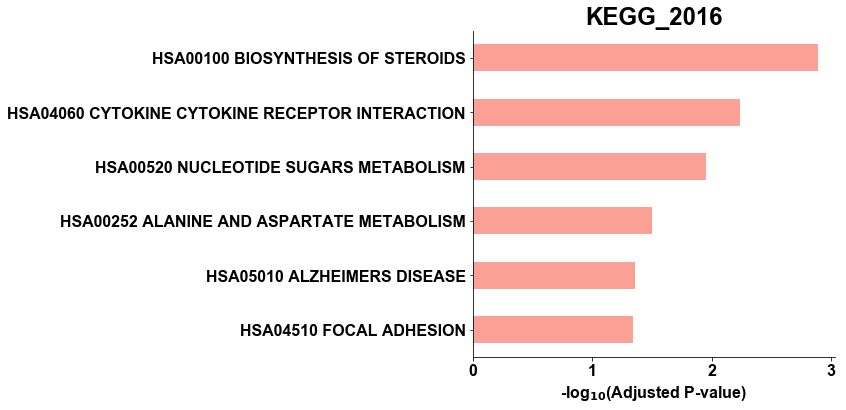

In [398]:
# simple plotting function
from gseapy.plot import barplot, dotplot

# to save your figure, make sure that ``ofname`` is not None
barplot(enr.res2d,title='KEGG_2016',)

In [407]:
# to save your figure, make sure that ``ofname`` is not None
dotplot(enr.res2d, title='KEGG_2013',cmap='viridis_r',cutoff=10,ofname='kegg.png')

In [424]:

module_list=mol[mol['module']==11].dropna()['gene'].values.tolist()
#enrichment of KEGG and GO
module_KEGG=enrichment_KEGG(module_list,
                     organism='Mouse')
module_GO=enrichment_GO(module_list,
                     organism='Mouse')
#enrichment of GSEA
result_DEG=find_DEG(data)
module_GSEA=enrichment_GSEA(data=result_DEG,
               gene_sets='KEGG_2016',
               processes=4,
               permutation_num=100)

AxesSubplot(0.125,0.125;0.775x0.755)


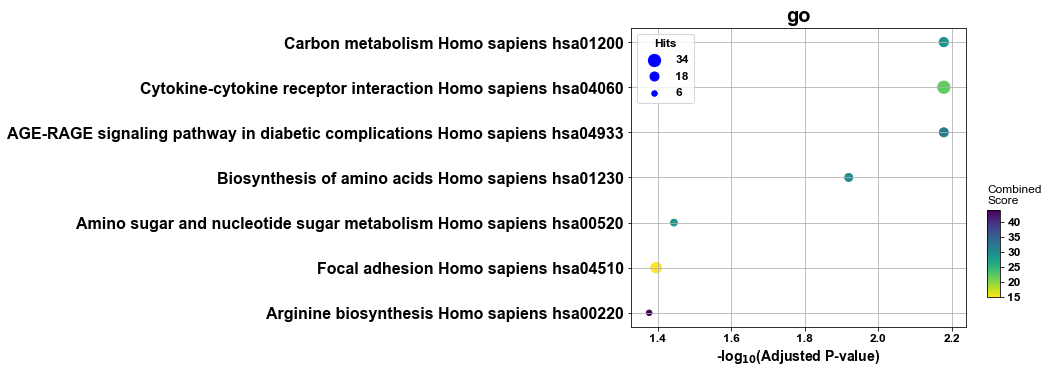

In [426]:
k=dotplot(ttty, title='go',cmap='viridis_r')
print(k)

In [419]:
def enrichment_GO(gene_list,
                    go_mode='Bio',
                    organism='Human',
                    description='test_name',
                    outdir='enrichment_go',
                    cutoff=0.5):
    if(go_mode=='Bio'):
        geneset='GO_Biological_Process_2018'
    if(go_mode=='Cell'):
        geneset='GO_Cellular_Component_2018'
    if(go_mode=='Mole'):
        geneset='GO_Molecular_Function_2018'
    enr = gp.enrichr(gene_list=gene_list,
                 gene_sets=geneset,
                 organism=organism, # don't forget to set organism to the one you desired! e.g. Yeast
                 description=description,
                 outdir=outdir,
                 # no_plot=True,
                 cutoff=cutoff # test dataset, use lower value from range(0,1)
                )
    dotplot(enr.res2d, title=description,cmap='viridis_r',ofname='go_'+go_mode+'.png')
    return enr.res2d

In [ ]:
#
result_DEG=find_DEG(data)
enrichment_GSEA(data=result_DEG,
               gene_sets='KEGG_2016',
               processes=4,
               permutation_num=100)

In [ ]:
def enrichment_GSEA(data,
                   gene_sets='KEGG_2016',
                   processes=4
                   permutation_num=100,
                   outdir='prerank_report_kegg',
                   seed=6):
    rnk=pd.DataFrame(columns=['genename','FoldChange'])
    rnk['genename']=data.index
    rnk['FoldChange']=data['FoldChange'].tolist()
    rnk1=rnk1.drop_duplicates(['genename'])
    rnk1=rnk1.sort_values(by='FoldChange', ascending=False)
    
    pre_res = gp.prerank(rnk=rnk1, gene_sets=gene_sets,
                     processes=processes,
                     permutation_num=permutation_num, # reduce number to speed up testing
                     outdir=outdir, format='png', seed=seed)
    pre_res.res2d.sort_index().to_csv('GSEA_result.csv')
    return pre_res

In [ ]:
def density_norm(data):
    grid = plt.GridSpec(1, 4, wspace=1, hspace=0.1)
    #plt.subplot(grid[0,0:2])
    data.plot(kind = 'density')
    plt.title('Pre')
    #plt.xlim(-1000,1000)
    ERlist=ERgene.FindERG(data)
    data2=ERgene.normalizationdata(data,ERlist[0])
    #plt.subplot(grid[0,2:4])
    data2.plot(kind='density')
    plt.title('After')